In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
DATA_FOLDER = '../DATA'
files = os.listdir(DATA_FOLDER)
sds_files = [i for i in files if 'sds011' in i]
bme_files = [i for i in files if 'bme280' in i]
dht_files = [i for i in files if 'dht22' in i]

In [3]:
data = pd.read_csv(os.path.join(
    DATA_FOLDER, '19836_sds011_sensor_.csv'), delimiter=';', parse_dates=['timestamp'], index_col=5)

In [4]:
sensors_data =[]

In [14]:
idx = pd.date_range('2019-04-01', '2019-12-05', freq='5T')

In [15]:
sds_data = pd.DataFrame(idx, columns=['date'])
sds_data = sds_data.set_index('date')

In [16]:
from pandas.errors import EmptyDataError
for f in sds_files:
    try:
        data = pd.read_csv(os.path.join(
            DATA_FOLDER, f), delimiter=';', parse_dates=['timestamp'], index_col=5)
        s_id = data.iloc[0].sensor_id
        s_type = data.iloc[0].sensor_type
        lat = data.iloc[0].lat
        lon = data.iloc[0].lon
        sensors_data.append([s_id, s_type, lat, lon])
        data['P1'] = data.P1.replace('unavailable', None)
        data['P2'] = data.P2.replace('unavailable', None)
        data['P1'] = data.P1.astype(float)
        data['P2'] = data.P2.astype(float)
        new_data = data['2019-04':].resample('5T').mean()
        new_data.reindex(idx, fill_value=None)
        sds_data['P1_'+str(s_id)] = new_data.P1
        sds_data['P2_'+str(s_id)] = new_data.P2
    except EmptyDataError:
        pass

In [17]:
sensors = pd.DataFrame(sensors_data, columns=['sensor_id', 'sensor_type', 'lat', 'lon'])

In [18]:
sensors.head()

,sensor_id,sensor_type,lat,lon
0,27418,SDS011,55.697960,37.535890
1,21332,SDS011,55.699000,37.498000
2,34535,SDS011,55.596000,37.538000
3,33626,SDS011,55.874089,37.510001
4,27213,SDS011,55.814000,37.460000


In [19]:
sds_data.head()

,P1_27418,P2_27418,P1_21332,P2_21332,P1_34535,P2_34535,P1_33626,P2_33626,P1_27213,P2_27213,...,P1_30289,P2_30289,P1_31666,P2_31666,P1_32439,P2_32439,P1_35514,P2_35514,P1_31862,P2_31862
date,,,,,,,,,,,,,,,,,,,,,
2019-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
p1_col = [i for i in sds_data.columns if 'P1_' in i]
p2_col = [i for i in sds_data.columns if 'P2_' in i]

In [29]:
sds_avg = pd.DataFrame(idx, columns=['date'])
sds_avg = sds_avg.set_index('date')

In [42]:
sds_avg['P1'] = sds_data[p1_col].mean(axis = 1, skipna = True)
sds_avg['P2'] = sds_data[p2_col].mean(axis = 1, skipna = True)
sds_avg['P1_std'] = sds_data[p1_col].std(axis = 1, skipna = True)
sds_avg['P2_std'] = sds_data[p2_col].std(axis = 1, skipna = True)

In [47]:
sds_avg_nov = sds_avg.loc['2019-09':'2019-11']

Text(0.5, 1.0, 'P2')

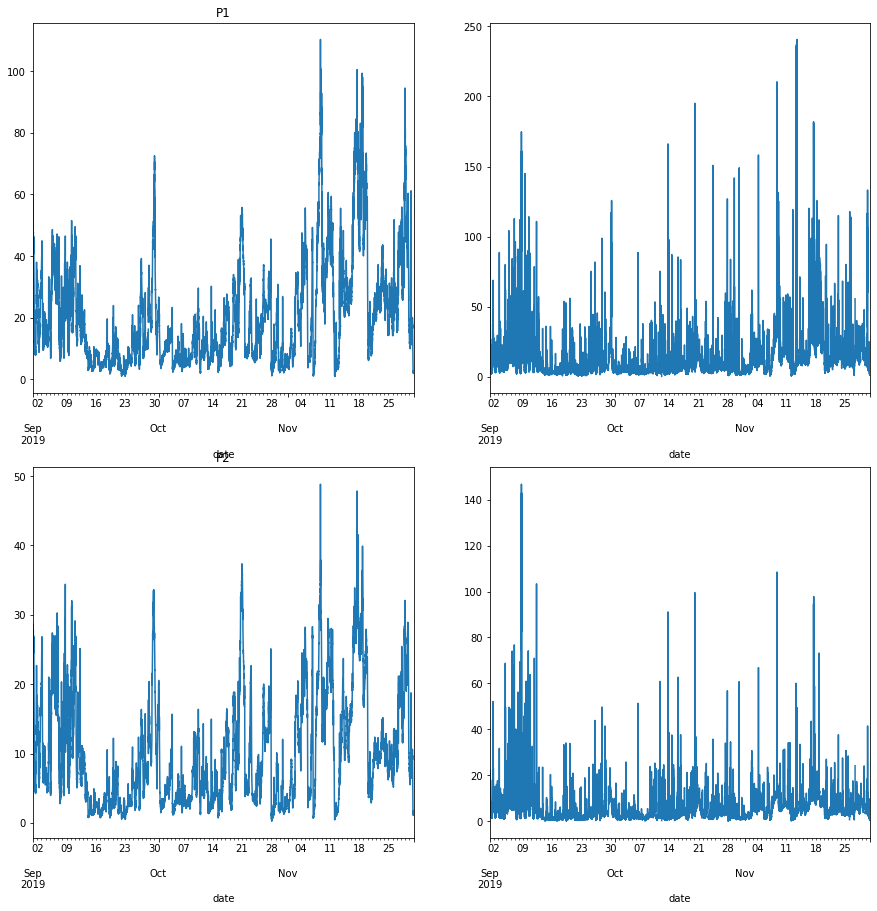

In [48]:
f, axs = plt.subplots(2,2,figsize=(15,15))
sds_avg_nov.P1.plot(ax=axs[0, 0])
sds_avg_nov.P2.plot(ax=axs[1, 0])
sds_avg_nov.P1_std.plot(ax=axs[0, 1])
sds_avg_nov.P2_std.plot(ax=axs[1, 1])
axs[0, 0].set_title('P1')
axs[1, 0].set_title('P2')